## ***# Data-Driven Insights into Unemployment: An Advanced Python Analysis***

Hi Everyone! Welcome to my notebook.

Hello! 👋 I'm Mehul Jain, and I'm excited to have you join me on this journey of data science exploration. 📊 Driven by a passion for data and a keen interest in machine learning, I'm here to delve into datasets, uncover insights, and drive meaningful outcomes.



# ***Overview***

***About Data***

Dataset contains unemployment statistics for Indian states including date of recording, measured monthly. It includes rates of unemployment, employed individuals, and labor participation among 16-64 year-olds.



***Overview***

Region: The specific region or state in India where the data was collected.

Date: The date the data was collected, providing a time frame for the analysis.

Frequency: The frequency of the data collection (e.g., daily, monthly, quarterly, annual).

Estimated Unemployment Rate (%): The estimated percentage of the labor force that is unemployed.

Estimated Employed: The estimated number of people who are employed.

Estimated Labour Participation Rate (%): The estimated percentage of the working-age population that is either employed or actively looking for work.

Area: Any additional information about the area that may be relevant (e.g., urban, rural).

***Task:***

Analyze trends in unemployment across Indian states over time, focusing on monthly data. Investigate factors affecting unemployment rates and explore variations in labor participation and employment levels. Provide insights into the impact of these trends on the Indian job market

***Import libraries***

In [1]:
# Importing necessary libraries for Unemployment Analysis

# Data manipulation and analysis
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis

# Data visualization
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For statistical data visualization

# Machine Learning
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.decomposition import PCA  # For dimensionality reduction
from sklearn.ensemble import RandomForestClassifier  # For classification model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For evaluating model performance

# Additional Libraries
import plotly.express as px  # For interactive plots
import statsmodels.api as sm  # For statistical models and tests

# Remove Warnings
import warnings
warnings.filterwarnings("ignore")
# Set the option to display all columns
pd.set_option('display.max_columns', None)

# Set plot style
sns.set(style="whitegrid")


In [2]:
# Import necessary libraries
import pandas as pd

# Upload CSV files to Colab
from google.colab import files
uploaded = files.upload()

# List the names of the uploaded files
file_names = list(uploaded.keys())
print(f"Uploaded files: {file_names}")

# Load the datasets
unemployment_in_india_df = pd.read_csv(file_names[0])  # Adjust index if needed
unemployment_rate_upto_11_2020_df = pd.read_csv(file_names[1])  # Adjust index if needed

# Display the first few rows of each dataset to confirm successful loading
print("Unemployment in India Dataset:")
print(unemployment_in_india_df.head())

print("\nUnemployment Rate up to 11 2020 Dataset:")
print(unemployment_rate_upto_11_2020_df.head())

# Check the shape and data types
print(f"\nShape of 'Unemployment in India' dataset: {unemployment_in_india_df.shape}")
print(f"Data types:\n{unemployment_in_india_df.dtypes}")

print(f"\nShape of 'Unemployment Rate up to 11 2020' dataset: {unemployment_rate_upto_11_2020_df.shape}")
print(f"Data types:\n{unemployment_rate_upto_11_2020_df.dtypes}")


Saving Unemployment_in_India.csv to Unemployment_in_India.csv
Saving Unemployment_Rate_upto_11_2020.csv to Unemployment_Rate_upto_11_2020.csv
Uploaded files: ['Unemployment_in_India.csv', 'Unemployment_Rate_upto_11_2020.csv']
Unemployment in India Dataset:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                        

In [4]:
unemployment_in_india_df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
# Max column printing option
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

***Rename the Attributes***

* Region = region
* Date = date
* Frequency = frequency
* Estimated Unemployment Rate (%) = estimated unemployment rate
* Estimated Employed = estimated employment
* Estimated Labour Participation Rate (%) = estimated labour participation rate
* Area = area


In [6]:
#Rename the columns
unemployment_in_india_df.columns =['region','date','frequency','estimated unemployment rate',
             'estimated employed','estimatesd labour participation rate','area']

# ***Basic Overview***

# ***unemployment_in_india***

In [8]:
# Information
unemployment_in_india_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   region                                740 non-null    object 
 1   date                                  740 non-null    object 
 2   frequency                             740 non-null    object 
 3   estimated unemployment rate           740 non-null    float64
 4   estimated employed                    740 non-null    float64
 5   estimatesd labour participation rate  740 non-null    float64
 6   area                                  740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [9]:
# Check rows and columns

print("Number of Rows in dataset: ", unemployment_in_india_df.shape[0])
print("Number of Columns in dataset: ", unemployment_in_india_df.shape[1])

Number of Rows in dataset:  768
Number of Columns in dataset:  7


In [10]:
# Function to print a summary of the DataFrame's column types
def print_data_summary(unemployment_in_india_df):
    # Count the number of categorical columns
    object_count = unemployment_in_india_df.select_dtypes(include=['object']).shape[1]
    # Count the number of float columns
    float_count = unemployment_in_india_df.select_dtypes(include=['float64']).shape[1]
    # Count the number of integer columns
    int_count = unemployment_in_india_df.select_dtypes(include=['int64']).shape[1]

    # Print the counts in a bullet-point format
    print(f"• object columns: {object_count}")
    print(f"• Float columns: {float_count}")
    print(f"• Integer columns: {int_count}")

# Print a heading for the data summary section (assuming 'heading' is a defined function)

print_data_summary(unemployment_in_india_df)

• object columns: 4
• Float columns: 3
• Integer columns: 0


In [11]:
# Describe the dataset
unemployment_in_india_df.describe()

,estimated unemployment rate,estimated employed,estimatesd labour participation rate
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


***Deal with Missing values***

In [12]:
# Check missing values
unemployment_in_india_df.isnull().sum().sort_values(ascending=False)


,0
region,28
date,28
frequency,28
estimated unemployment rate,28
estimated employed,28
estimatesd labour participation rate,28
area,28


In [14]:
unemployment_in_india_df.isnull().sum() / len(unemployment_in_india_df) * 100

,0
region,3.645833
date,3.645833
frequency,3.645833
estimated unemployment rate,3.645833
estimated employed,3.645833
estimatesd labour participation rate,3.645833
area,3.645833


In [15]:
# Drop Missing values
unemployment_in_india_df = unemployment_in_india_df.dropna()


In [16]:
unemployment_in_india_df.isnull().sum()


,0
region,0
date,0
frequency,0
estimated unemployment rate,0
estimated employed,0
estimatesd labour participation rate,0
area,0


<Axes: >

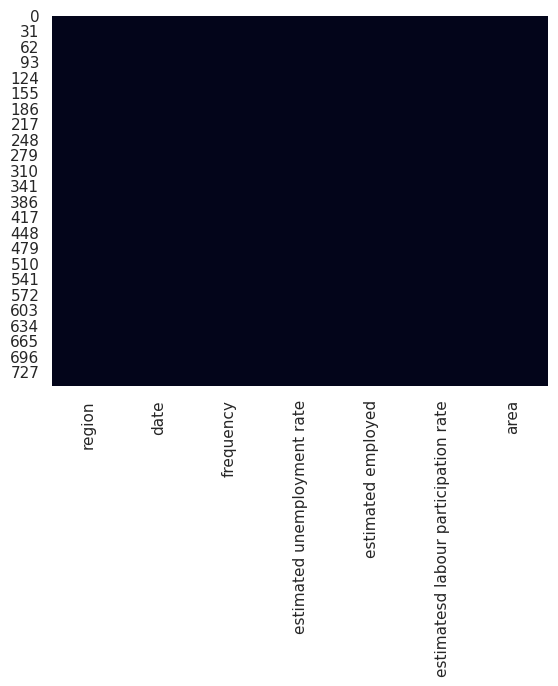

In [17]:
sns.heatmap(unemployment_in_india_df.isnull(),cbar=False)

***Identify Duplicates***

In [19]:
# Check dupliates values
unemployment_in_india_df.duplicated().sum()

0

***Check Correlation***

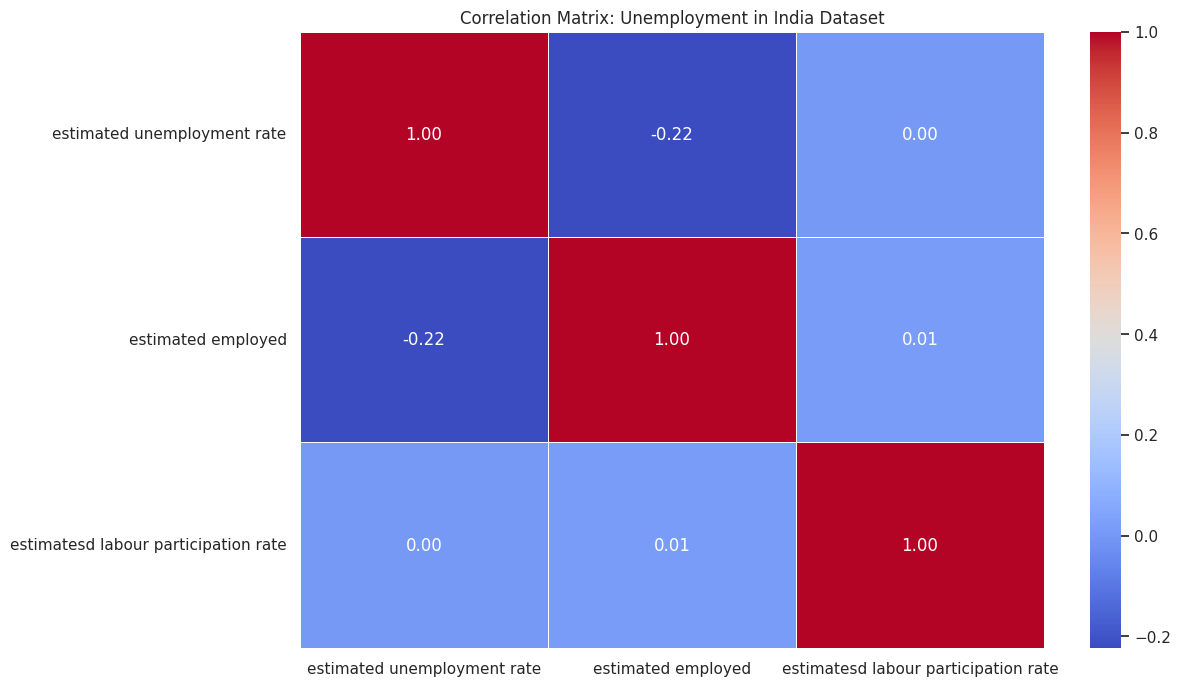

In [21]:
# Import necessary libraries for correlation analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for the 'Unemployment in India' dataset
# Exclude columns with non-numeric data types before calculating correlation
correlation_matrix_india = unemployment_in_india_df.select_dtypes(include=['number']).corr()

# Plot the correlation matrix for 'Unemployment in India' dataset
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_india, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Unemployment in India Dataset')
plt.show()

***Value counts***

In [22]:
unemployment_in_india_df.head()

,region,date,frequency,estimated unemployment rate,estimated employed,estimatesd labour participation rate,area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


Axes(0.125,0.11;0.775x0.77)


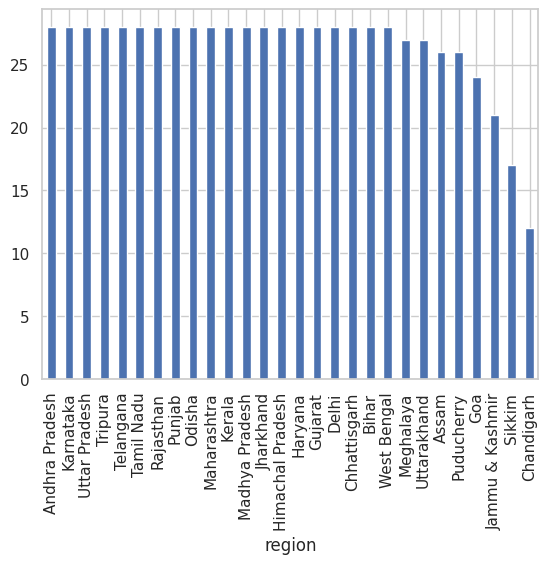

In [24]:
print(unemployment_in_india_df.value_counts('region').plot.bar())

Axes(0.125,0.11;0.775x0.77)


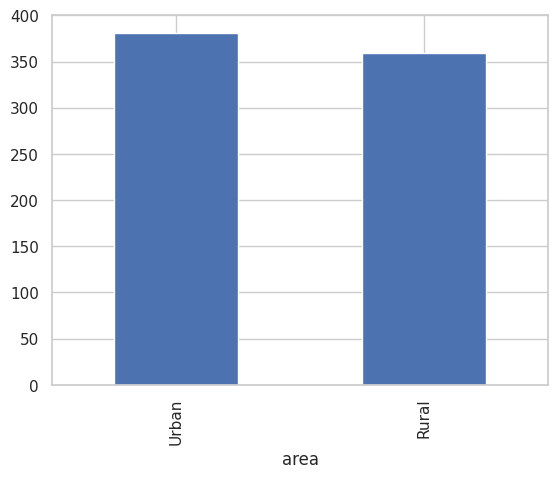

In [25]:
# value count of area
print(unemployment_in_india_df.value_counts('area').plot.bar())


In [26]:
print(unemployment_in_india_df.value_counts('frequency'))

frequency
Monthly     381
 Monthly    359
Name: count, dtype: int64


In [27]:
unemployment_in_india_df['frequency'] = unemployment_in_india_df['frequency'].replace(' Monthly','Monthly')

In [28]:
unemployment_in_india_df.value_counts('frequency' )

,count
frequency,
Monthly,740


***Extract data***

In [29]:
unemployment_in_india_df['date'] = pd.to_datetime(unemployment_in_india_df['date'])
unemployment_in_india_df['date_year'] = unemployment_in_india_df['date'].dt.year

unemployment_in_india_df.sample(5)

,region,date,frequency,estimated unemployment rate,estimated employed,estimatesd labour participation rate,area,date_year
88,Gujarat,2020-01-31,Monthly,5.35,14301844.0,54.07,Rural,2020
193,Maharashtra,2019-09-30,Monthly,4.40,25219281.0,49.74,Rural,2019
718,Uttar Pradesh,2019-11-30,Monthly,11.31,14128888.0,40.60,Urban,2019
270,Rajasthan,2020-06-30,Monthly,13.86,16076978.0,43.98,Rural,2020
277,Tamil Nadu,2019-06-30,Monthly,0.92,16375303.0,50.99,Rural,2019


In [30]:
unemployment_in_india_df['date_month_no'] = unemployment_in_india_df['date'].dt.month

unemployment_in_india_df.sample(5)


,region,date,frequency,estimated unemployment rate,estimated employed,estimatesd labour participation rate,area,date_year,date_month_no
119,Himachal Pradesh,2020-04-30,Monthly,2.13,984171.0,18.43,Rural,2020,4
30,Bihar,2019-09-30,Monthly,8.87,23905700.0,38.57,Rural,2019,9
669,Sikkim,2020-06-30,Monthly,2.63,76269.0,35.85,Urban,2020,6
229,Odisha,2020-05-31,Monthly,9.45,9683719.0,36.48,Rural,2020,5
58,Delhi,2019-09-30,Monthly,12.50,166056.0,40.68,Rural,2019,9


In [31]:
unemployment_in_india_df['Month_name'] = unemployment_in_india_df['date'].dt.month_name()

unemployment_in_india_df.sample(5)

,region,date,frequency,estimated unemployment rate,estimated employed,estimatesd labour participation rate,area,date_year,date_month_no,Month_name
619,Puducherry,2019-08-31,Monthly,8.95,312882.0,42.41,Urban,2019,8,August
93,Gujarat,2020-06-30,Monthly,1.41,13243922.0,47.72,Rural,2020,6,June
315,Tripura,2020-04-30,Monthly,43.64,675083.0,52.63,Rural,2020,4,April
161,Kerala,2019-05-31,Monthly,6.63,5184355.0,38.07,Rural,2019,5,May
733,Uttarakhand,2019-12-31,Monthly,7.39,844779.0,31.65,Urban,2019,12,December


In [32]:
unemployment_in_india_df['date_day'] = unemployment_in_india_df['date'].dt.day

unemployment_in_india_df.sample(5)

,region,date,frequency,estimated unemployment rate,estimated employed,estimatesd labour participation rate,area,date_year,date_month_no,Month_name,date_day
220,Odisha,2019-08-31,Monthly,3.68,11727659.0,42.13,Rural,2019,8,August,31
450,Delhi,2020-02-29,Monthly,14.86,5708807.0,44.18,Urban,2020,2,February,29
138,Jharkhand,2019-10-31,Monthly,6.57,7761243.0,42.33,Rural,2019,10,October,31
747,West Bengal,2019-12-31,Monthly,7.24,11335696.0,45.97,Urban,2019,12,December,31
8,Andhra Pradesh,2020-01-31,Monthly,4.84,12016676.0,43.46,Rural,2020,1,January,31


# **[ EDA ] Exploratary data analysis**

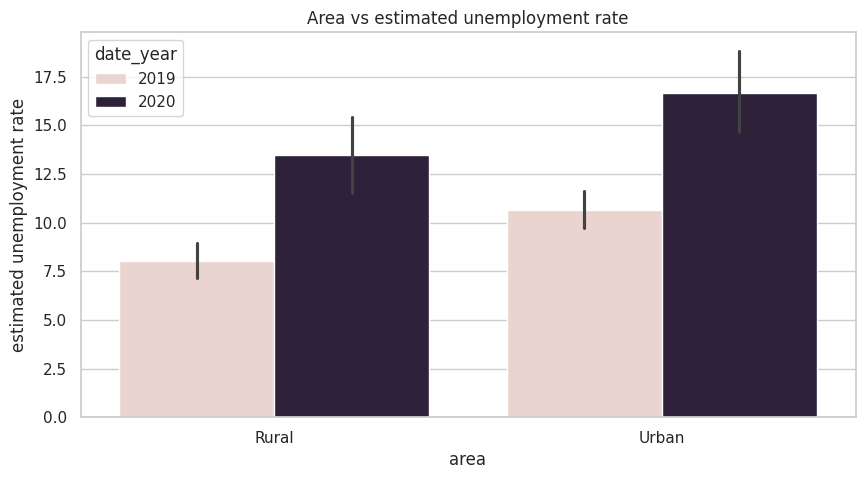

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(x='area', y='estimated unemployment rate', data=unemployment_in_india_df, hue='date_year')
plt.title("Area vs estimated unemployment rate")
plt.show()

In [34]:
# check minimum and maximum unemployment rate
print("Minimum unemployment rate: ", unemployment_in_india_df['estimated unemployment rate'].min())
print("Maximum unemployment rate: ", unemployment_in_india_df['estimated unemployment rate'].max())

Minimum unemployment rate:  0.0
Maximum unemployment rate:  76.74


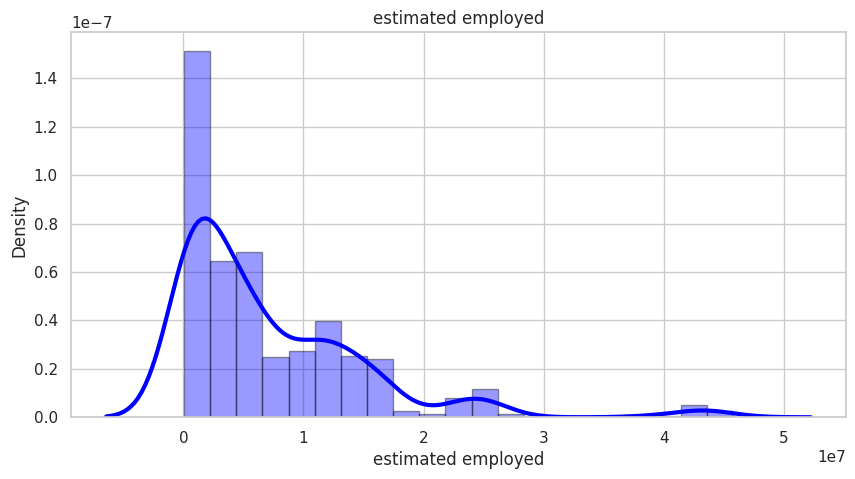

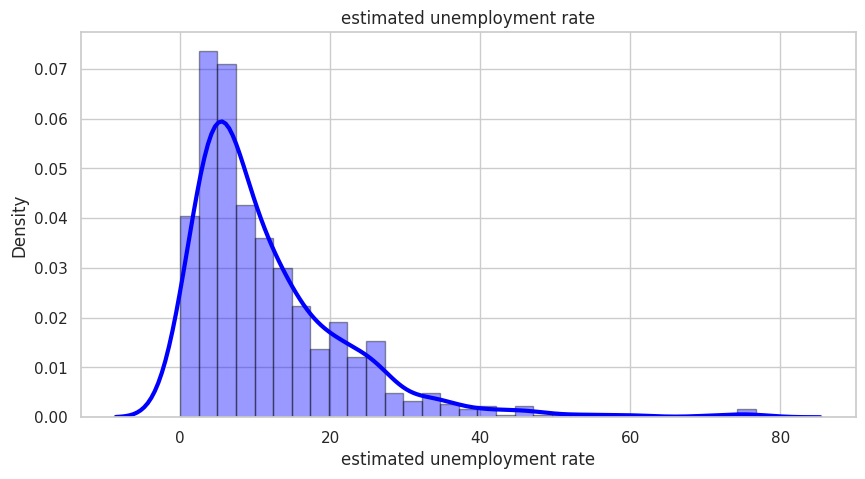

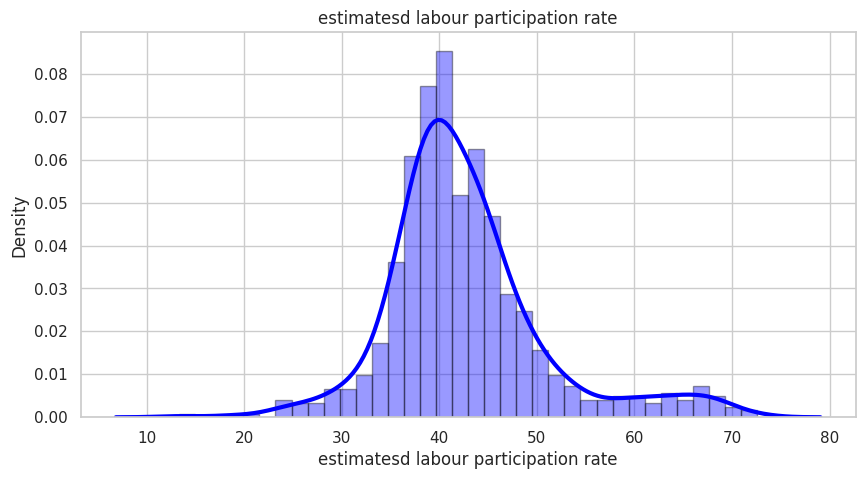

In [36]:
# Make distplot on estimated employed ,estimated unemployment rate,estimatesd labour participation rate using for loop
for col in ['estimated employed','estimated unemployment rate','estimatesd labour participation rate']:
    plt.figure(figsize=(10,5))
    sns.distplot(unemployment_in_india_df[col],color='blue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 3})
    plt.title(col)
    plt.show()

***Bar Plot***

In [37]:
#create  Sample data
data = {
    'region': ['Andhra Pradesh','Tripura','Karnataka','Meghalaya','Uttar Pradesh','Jammu & Kashmir '],
    'date': ['31-05-2019', '30-06-2019', '31-07-2019', '31-08-2019', '30-09-2019', '31-10-2019'],
    'estimated_unemployment_rate': [3.65, 3.05, 3.75, 3.32, 5.17, 3.83],
    'area': ['Rural', 'Urban', 'Rural', 'Urban', 'Rural','Urban']
}

# Create a DataFrame from the sample data
df_1 = pd.DataFrame(data)

# Convert the 'date' column to datetime format
df_1['date'] = pd.to_datetime(df_1['date'], format='%d-%m-%Y')

# Create a line plot using plotly
fig = px.bar(df_1,
        x='date',
        y='estimated_unemployment_rate',
        color='region',
        title='Estimated Unemployment Rate Over Time by Region',
        labels={
            'date': 'Date',
            'estimated_unemployment_rate': 'Estimated Unemployment Rate (%)',
            'region': 'Region',
            'area' : 'Area'
        },
        barmode='stack'
    )

# # show the plot
fig.show()

***Scatter plot***

In [38]:
fig = px.scatter(unemployment_in_india_df, x='estimatesd labour participation rate',
                 y='estimated unemployment rate',
                 color='region',
                 size='estimated employed',
                 hover_data=['area'],
                 title='Relationship between Estimated Labor Participation Rate and Estimated Unemployment Rate')
fig.show()

In [39]:
# Create a heatmap using Plotly Express
fig = px.density_heatmap(
    unemployment_in_india_df,
    x='date',
    y='region',
    z='estimatesd labour participation rate',
    histfunc='avg',
    title='Estimated  labour participation Heatmap',
    labels={
        'date': 'Date',
        'region': 'Region',
        'estimatesd labour participation rate': 'Estimated labour participation Rate (%)'
    },
    color_continuous_scale='Viridis'  # Color intensity scale
)

# Add colorbar title
fig.update_layout(coloraxis_colorbar=dict(title='labour participation Rate(%)'))

# Show the interactive plot
fig.show()

In [40]:
fig = px.bar(unemployment_in_india_df,x='region',y='estimated unemployment rate',animation_frame='Month_name',color='region',
            title='Unemployment rate from Jan 2020 to Oct 2020(State)',color_continuous_scale='RdBu_r'
            )

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

# ***unemployment_rate_upto_11_2020***

In [41]:
unemployment_rate_upto_11_2020_df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [43]:
#Rename the columns
unemployment_rate_upto_11_2020_df.columns =['state','date','frequency','estimated unemployment rate',
             'estimated employed','estimatesd labour participation rate','region','longitude','latitude']

In [44]:
# Create sunbrust chart using Plotly Express

fig = px.sunburst(unemployment_rate_upto_11_2020_df, path=['region', 'state'], values='estimated unemployment rate',
                  color='estimated employed', hover_data=['state'],height=600,)

# Show the plot
fig.show()